#  CONTENTS

##### 1. Introduction: (#1)

##### 2. Loading Data and Explanation of Features: (#2)

##### 3. Exploratory Data Analysis (EDA): (#3)

##### 4. Applying Regression Models: (#4)

##### 5. Conclusion: (#5)

# 1. Introduction
 
This dataset contains information about used cars listed on www.cardekho.com.

We are going to use for finding predictions of price with the use of various regression models.

The datasets consist of several independent variables include:

1.Car_Name

2.Year

3.Selling_Price

4.Present_Price

5.Kms_Driven

6.Fuel_Type

7.Seller_Type

8.Transmission

9.Owner

We are going to use some of the variables which we need for regression models.

# 2. Loading Data and Explanation of Features

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warning 
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf #Auto-Correlation Plots
from statsmodels.graphics.tsaplots import plot_pacf #Partial-Auto Correlation Plots

sns.set()

In [2]:
# Input data files are available in the directory where the file is present.
import os
for dirname, _, filenames in os.walk('/Users/KIIT/MACHINE LEARNING FILES'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/KIIT/MACHINE LEARNING FILES\2018-2010_export.csv
/Users/KIIT/MACHINE LEARNING FILES\2018-2010_import.csv
/Users/KIIT/MACHINE LEARNING FILES\boston-housing.enc
/Users/KIIT/MACHINE LEARNING FILES\car data.csv
/Users/KIIT/MACHINE LEARNING FILES\CAR DATA.ipynb
/Users/KIIT/MACHINE LEARNING FILES\DT uses.ipynb
/Users/KIIT/MACHINE LEARNING FILES\India-Import and Export.ipynb
/Users/KIIT/MACHINE LEARNING FILES\Iris(Random Forest).ipynb
/Users/KIIT/MACHINE LEARNING FILES\Iris.xls
/Users/KIIT/MACHINE LEARNING FILES\Jones_Monster.ipynb
/Users/KIIT/MACHINE LEARNING FILES\Jones_Titanic_survival.ipynb
/Users/KIIT/MACHINE LEARNING FILES\Linear Regression - scratch.enc
/Users/KIIT/MACHINE LEARNING FILES\Logistic Regression.pptx
/Users/KIIT/MACHINE LEARNING FILES\programming .ipynb
/Users/KIIT/MACHINE LEARNING FILES\PUBG Finish Placement Prediction.ipynb
/Users/KIIT/MACHINE LEARNING FILES\sample_submission.csv
/Users/KIIT/MACHINE LEARNING FILES\Session3.enc
/Users/KIIT/MACHINE LEARNING FILES\tes

In [3]:
car = pd.read_csv("/Users/KIIT/MACHINE LEARNING FILES/car data.csv")

In [4]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


In [6]:
car.isna().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

Looks like our data is totally complete one. 

There is no NaN(null) values and also feature's types are proper.

Lets see value counts of the features which are the object type.

In [7]:
print(car.Fuel_Type.value_counts(),"\n")
print(car.Seller_Type.value_counts(),"\n")
print(car.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 

Manual       261
Automatic     40
Name: Transmission, dtype: int64


So from this observation,

I am going to chance these object values to numerical values to make it proper for the regression models.

##### Fuel_Type ==> 1 = Petrol , 0 = Diesel , 2 = CNG
##### Transmission ==> 1 = Manual , 0 = Automatic 
##### Seller_Type ==> 1 = Dealer , 0 = Individual

In [8]:
car.Fuel_Type.replace(regex={"Petrol":"0","Diesel":"1","CNG":"2"},inplace=True)
car.Seller_Type.replace(regex={"Dealer":"0","Individual":"1"},inplace=True)
car.Transmission.replace(regex={"Manual":"0","Automatic":"1"},inplace=True)
car[["Fuel_Type","Seller_Type","Transmission"]]=car[["Fuel_Type","Seller_Type","Transmission"]].astype(int)

# 3. Exploratory Data Analysis (EDA)

Before applying the regression models, lets take a look at the features and also relationship with each other by visually.

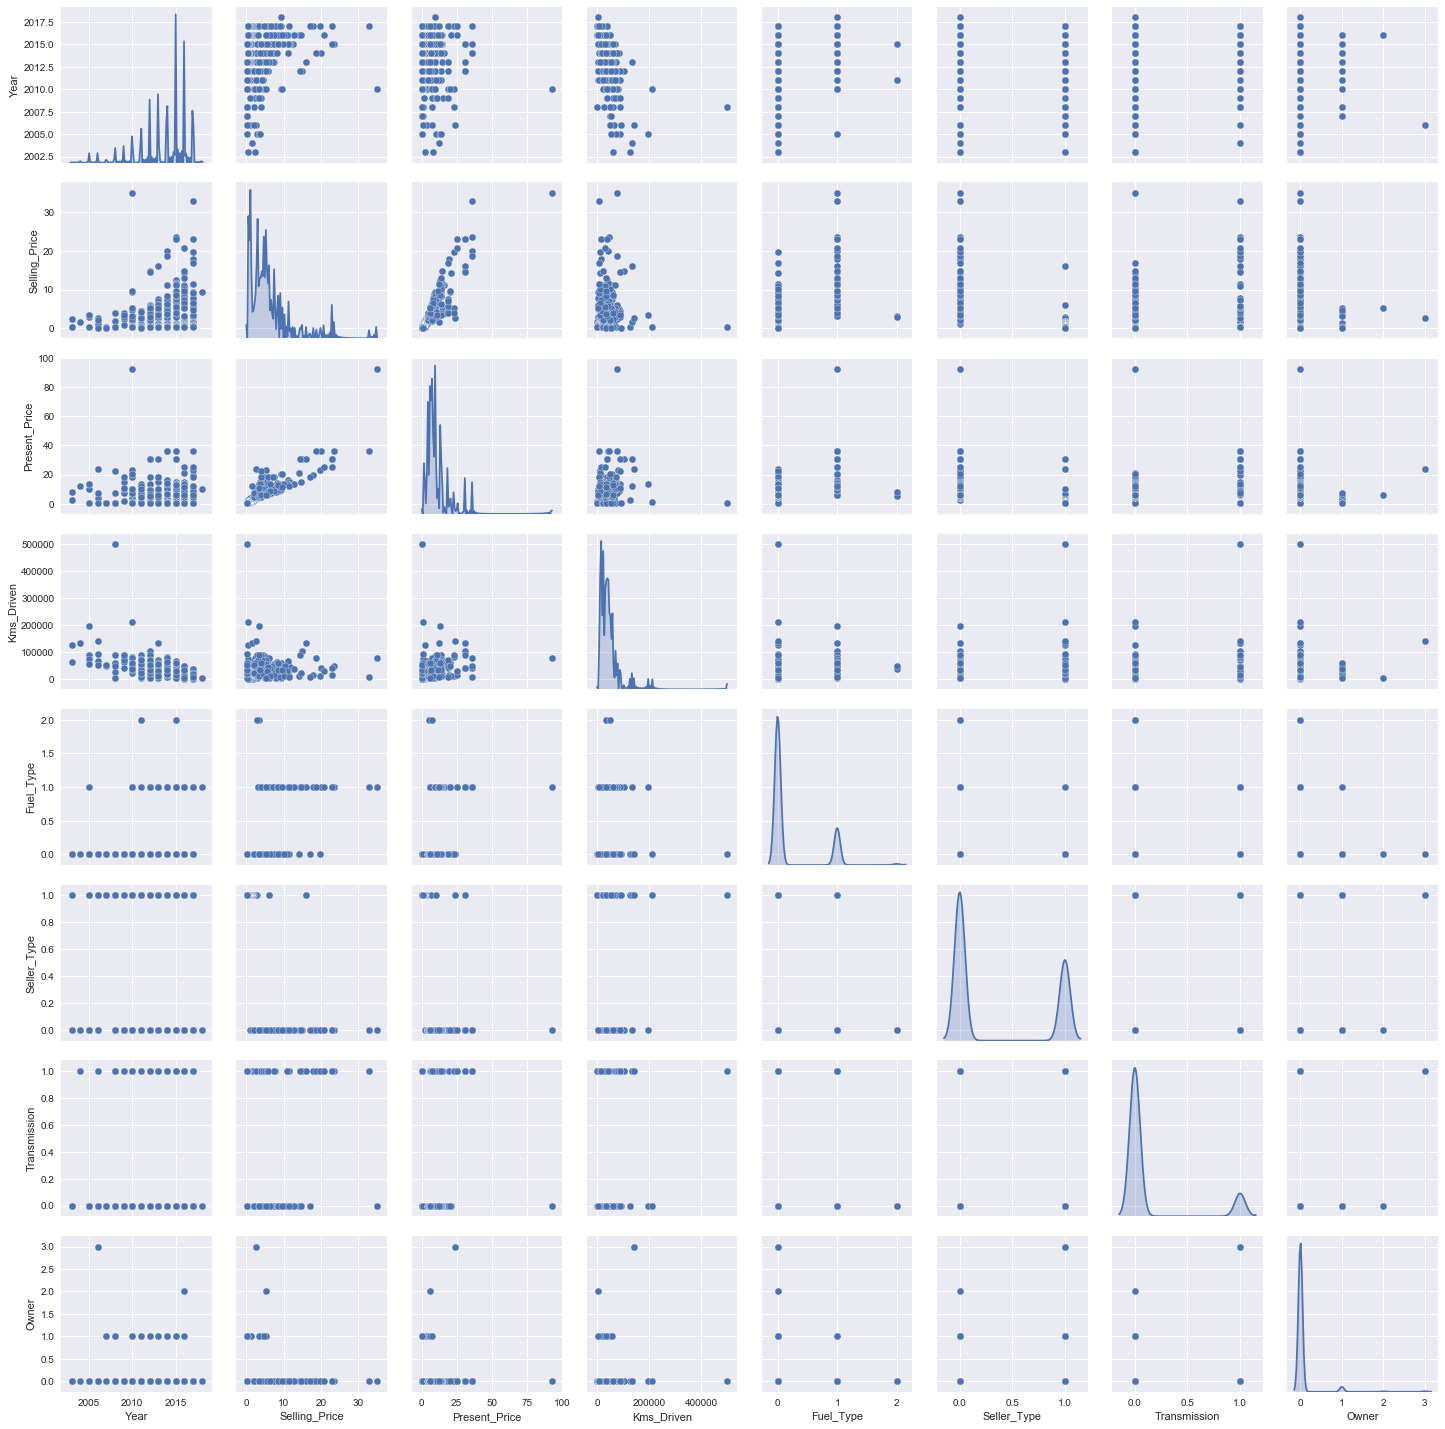

In [9]:
sns.pairplot(car,diag_kind="kde", diag_kws=dict(shade=True, bw=0.05, vertical=False))
plt.show()

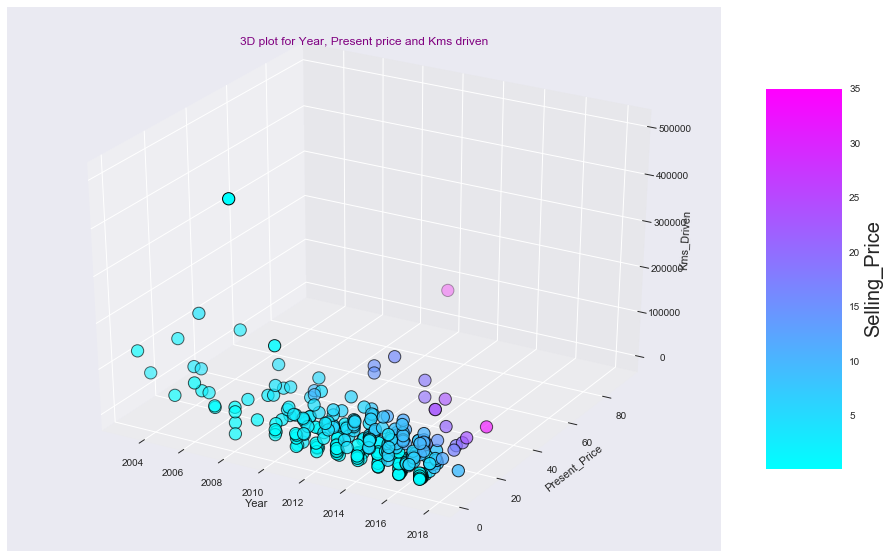

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,10))
ax  = fig.gca(projection = "3d")

plot =  ax.scatter(car["Year"],
           car["Present_Price"],
           car["Kms_Driven"],
           linewidth=1,edgecolor ="k",
           c=car["Selling_Price"],s=150,cmap="cool")

ax.set_xlabel("Year")
ax.set_ylabel("Present_Price")
ax.set_zlabel("Kms_Driven")

lab = fig.colorbar(plot,shrink=0.7,aspect=5)
lab.set_label("Selling_Price",fontsize = 20)

plt.title("3D plot for Year, Present price and Kms driven",color="purple")
plt.show()

On applying the 3D plot features that effect selling price,
we can see most of the cars accumulate around and after 2010 year, with low present price and low kms driven.

Now its time to apply regression models.

# 4. Applying Regression Models

Firstly lets separate Selling price from the data and drop out all the unnecessary features.

In [11]:
y=car.Selling_Price
x=car.drop(["Selling_Price","Car_Name"],axis=1)

Spliting data to train and test sizes.

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 7)
x test:  (61, 7)
y train:  (240,)
y test:  (61,)


Secondly, we are going to load the libraries which we need for the calculation of scores for the various regression models.

Then apply function which fit the models, get the scores and at last plot our predictions .



In [13]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [14]:
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

# Main function for models
def model(algorithm,x_train_,y_train_,x_test_,y_test_): 
    algorithm.fit(x_train_,y_train_)
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    cross_val=cross_val_score(algorithm,x_train_,y_train_,cv=cv)
    
    # Appending results to Lists 
    r_2.append(R_2)
    CV.append(cross_val.mean())
    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    
    # Plot for prediction vs originals
    test_index=y_test_.reset_index()["Selling_Price"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="b")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

##### 1. Linear Regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) 

r_2 score : 0.8484296085136116 

CV scores: [0.89746723 0.88756505 0.83007487 0.81438137 0.75880539] 

CV scores mean: 0.8376587811920079


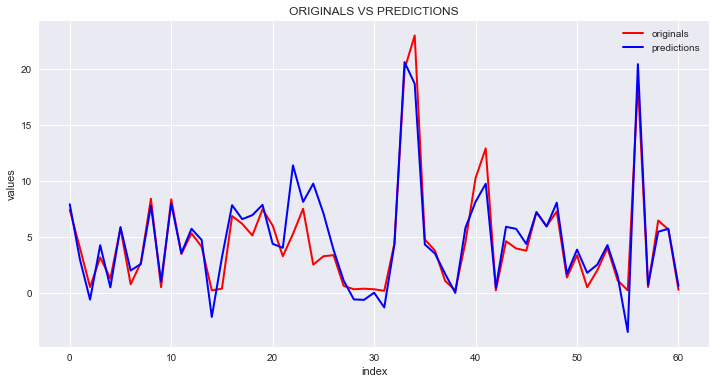

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,x_train,y_train,x_test,y_test)

##### 2. Lasso

Before applying Lasso model, I am going to assign an alpha range that effects the  model and choose the best estimator for model.

In [16]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3,3,num=14) # range for alpha

grid = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alphas))
grid.fit(x_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.8448893668196061
0.001


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) 

r_2 score : 0.8527612897793881 

CV scores: [0.89716619 0.88736684 0.830188   0.81541598 0.76120855] 

CV scores mean: 0.8382691136251517


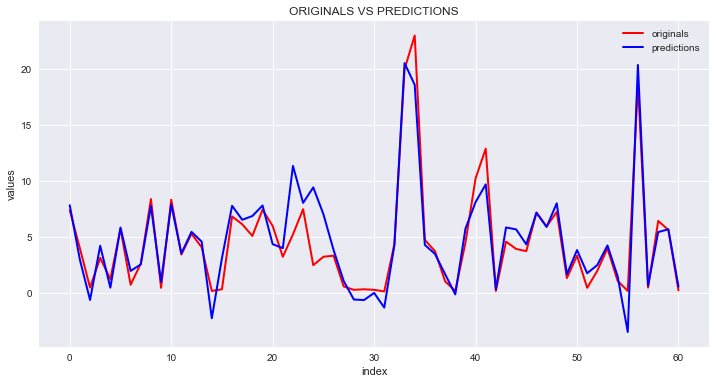

In [17]:
ls = Lasso(alpha = grid.best_estimator_.alpha, normalize = True) # applied the best estimator
model(ls,x_train,y_train,x_test,y_test)

##### 3. Ridge

We are going to do same operation for Ridge

In [18]:
from sklearn.linear_model import Ridge

alphas = np.logspace(-3,3,num=14) # range for alpha

grid2 = GridSearchCV(estimator=Ridge(), param_grid=dict(alpha=alphas)) 
grid2.fit(x_train, y_train)

print(grid2.best_score_)
print(grid2.best_estimator_.alpha)

0.8451836594225118
0.001


Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001) 

r_2 score : 0.8495566286274803 

CV scores: [0.89841767 0.88466039 0.82899042 0.81480488 0.77521494] 

CV scores mean: 0.8404176598072949


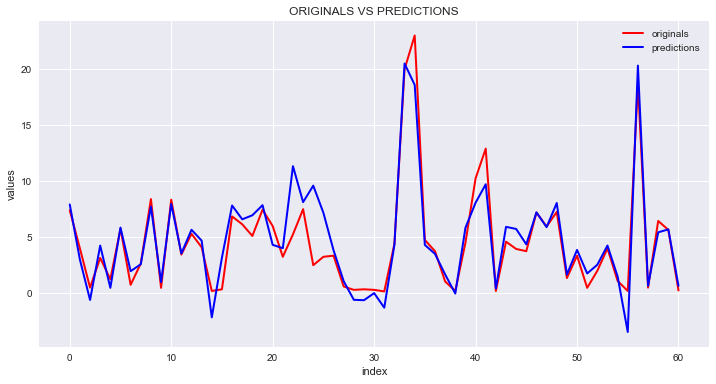

In [19]:
ridge = Ridge(alpha = 0.01, normalize = True) # applied the best estimator
model(ridge,x_train,y_train,x_test,y_test)

##### 4. Decision Tree Regressor

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') 

r_2 score : 0.9284539611906891 

CV scores: [0.91094924 0.86821798 0.88933188 0.88328865 0.74404408] 

CV scores mean: 0.8591663664674855


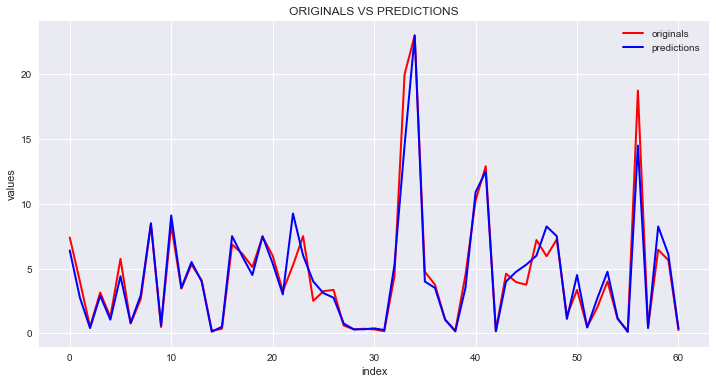

In [20]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model(dtr,x_train,y_train,x_test,y_test)

##### 5. Random Forest Regressor

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False) 

r_2 score : 0.9010394774818982 

CV scores: [0.93408048 0.9694762  0.85501997 0.9376604  0.72016603] 

CV scores mean: 0.8832806149939184


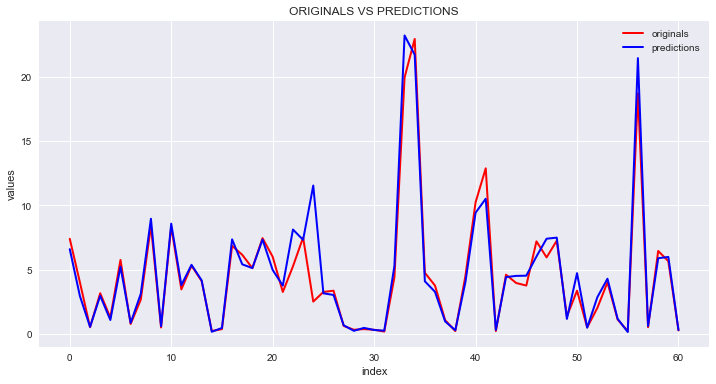

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
model(rf,x_train,y_train,x_test,y_test)

Lets see the results together in dataframe

In [22]:
Model = ["LinearRegression","Lasso","Ridge","DecisionTreeRegressor","RandomForestRegressor"]
results=pd.DataFrame({'Model': Model,'R Squared': r_2,'CV score mean': CV})
results

,Model,R Squared,CV score mean
0,LinearRegression,0.848430,0.837659
1,Lasso,0.852761,0.838269
2,Ridge,0.849557,0.840418
3,DecisionTreeRegressor,0.928454,0.859166
4,RandomForestRegressor,0.901039,0.883281


## 5. Conclusion

We applied couple of regression models on dataset. From the final dataframe, it gives opinion about the score of models and also the plots help us to understand which models is more succesful.The dataset is being predicted by each regression models by different regression methods and thus the results variate on the basis of their way of approach.

# THANK YOU

### NAME - SHILADITYA ROY

### CLASS - CSSE 2

### ROLL NUMBER - 1828102
